In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import HuberRegressor

In [3]:
df1 = pd.read_csv('mental-and-substance-use-as-share-of-diseases.csv')
df2 = pd.read_csv('prevalence-by-mental-and-substance-use-disorders.csv')

In [4]:
numeric_columns = df1.select_dtypes(include=[np.number]).columns
df1[numeric_columns] = df1[numeric_columns].fillna(df1[numeric_columns].mean())

numeric_columns = df2.select_dtypes(include=[np.number]).columns
df2[numeric_columns] = df2[numeric_columns].fillna(df2[numeric_columns].mean())


In [5]:
df1['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'] = df1['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'].astype(float)

# Converted columns in df2 as well

df2['Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)'].astype(float)
df2['Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)'].astype(float)
df2['Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)
df2['Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)
df2['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)
df2['Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)
df2['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)

In [6]:
merged_df = pd.merge(df1, df2, on=['Entity', 'Code', 'Year'])

In [7]:
X = merged_df.drop(['Entity', 'Code', 'Year', 'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'], axis=1)
y = merged_df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

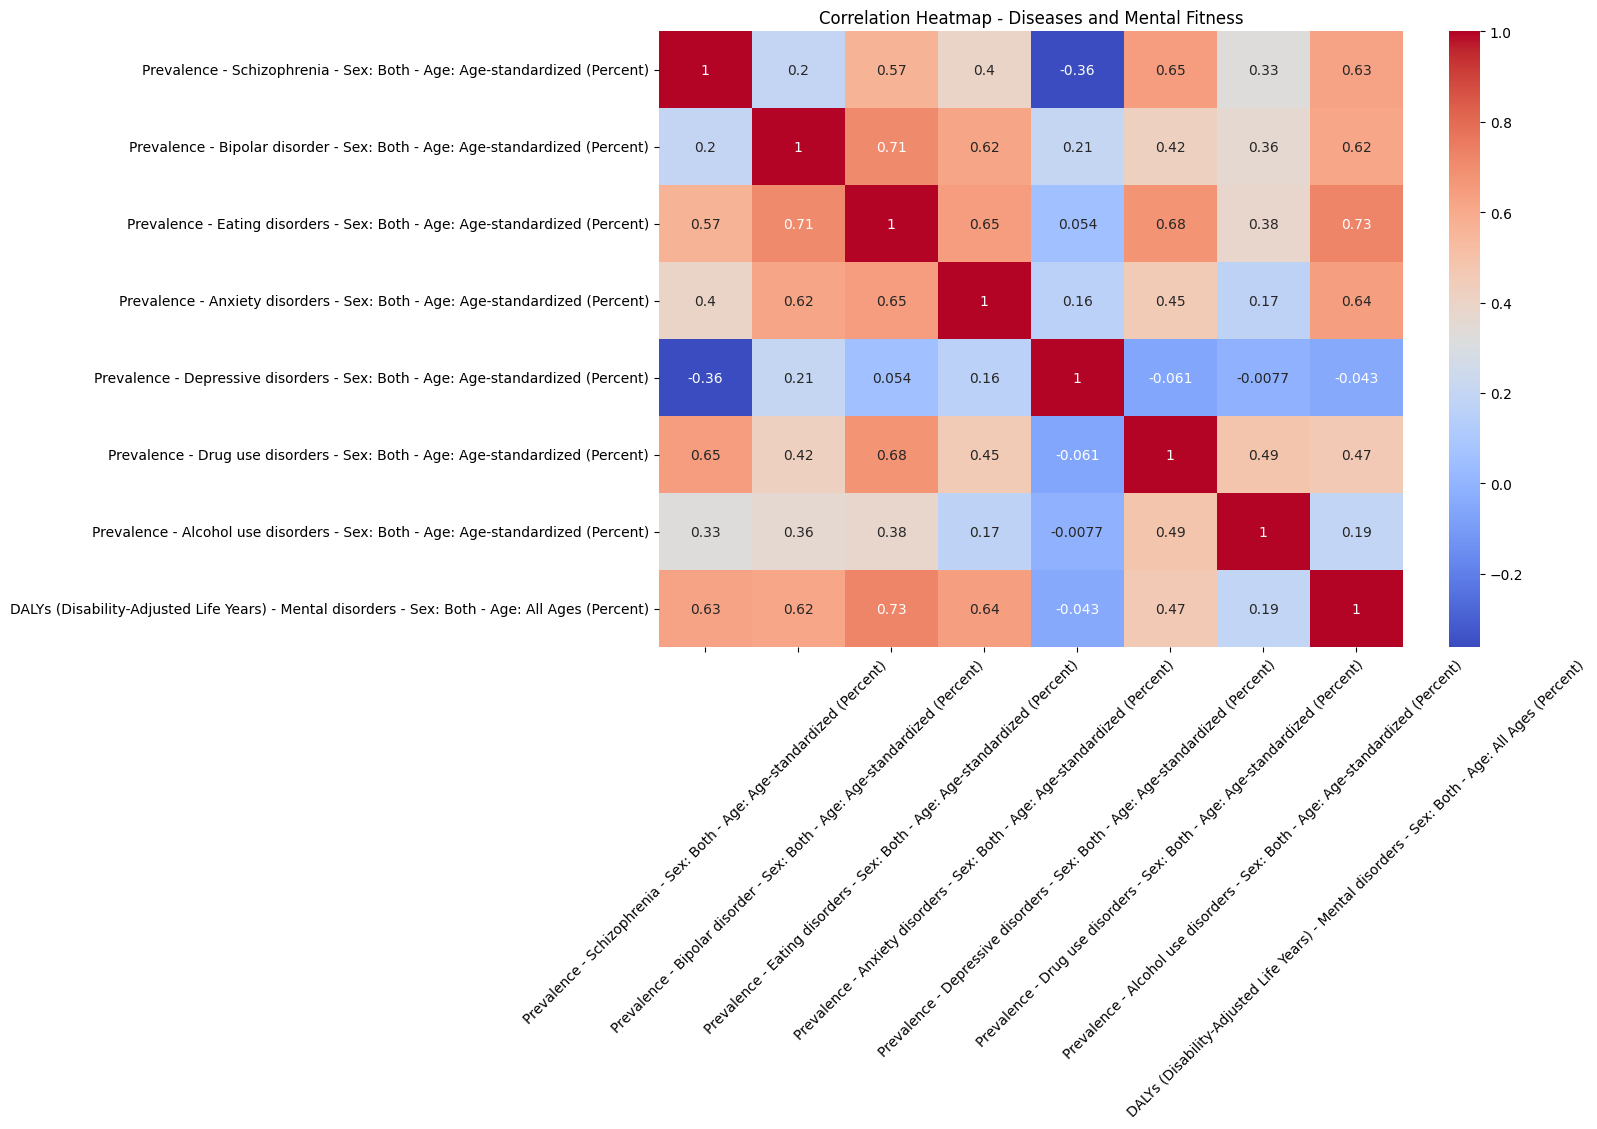

In [9]:
# Compute the correlation matrix
corr_matrix = merged_df[['Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',
                         'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
                         'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
                         'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
                         'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
                         'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
                         'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)',
                         'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'
                        ]].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Diseases and Mental Fitness')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
# Create a dictionary to store the model performance
model_performance = {}

# Tweedie Regressor
tweedie_model = TweedieRegressor()
tweedie_model.fit(X_train, y_train)
tweedie_y_pred = tweedie_model.predict(X_test)
tweedie_mse = mean_squared_error(y_test, tweedie_y_pred)
tweedie_r2 = r2_score(y_test, tweedie_y_pred)
model_performance['14. Tweedie Regressor'] = {'MSE': tweedie_mse, 'R-squared': tweedie_r2}

# Ridge Regression
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
model_performance['1. Ridge Regression'] = {'MSE': ridge_mse, 'R-squared': ridge_r2}

# Orthogonal Matching Pursuit (OMP)
omp_model = OrthogonalMatchingPursuit()
omp_model.fit(X_train, y_train)
omp_y_pred = omp_model.predict(X_test)
omp_mse = mean_squared_error(y_test, omp_y_pred)
omp_r2 = r2_score(y_test, omp_y_pred)
model_performance['15. Orthogonal Matching Pursuit'] = {'MSE': omp_mse, 'R-squared': omp_r2}

# Lasso Regression
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
model_performance['2. Lasso Regression'] = {'MSE': lasso_mse, 'R-squared': lasso_r2}

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)
elastic_net_y_pred = elastic_net_model.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_y_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_y_pred)
model_performance['3. Elastic Net Regression'] = {'MSE': elastic_net_mse, 'R-squared': elastic_net_r2}

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
X_test_poly = poly_features.transform(X_test)
poly_y_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_r2 = r2_score(y_test, poly_y_pred)
model_performance['4. Polynomial Regression'] = {'MSE': poly_mse, 'R-squared': poly_r2}

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)
model_performance['5. Decision Tree Regression'] = {'MSE': tree_mse, 'R-squared': tree_r2}

# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_y_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)
model_performance['6. Random Forest Regression'] = {'MSE': forest_mse, 'R-squared': forest_r2}

# SVR (Support Vector Regression)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
model_performance['7. Support Vector Regression'] = {'MSE': svr_mse, 'R-squared': svr_r2}

# XGBoost Regression
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
model_performance['8. XGBoost Regression'] = {'MSE': xgb_mse, 'R-squared': xgb_r2}

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
model_performance['9. K-Nearest Neighbors Regression'] = {'MSE': knn_mse, 'R-squared': knn_r2}

# Bayesian Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
bayesian_y_pred = bayesian_model.predict(X_test)
bayesian_mse = mean_squared_error(y_test, bayesian_y_pred)
bayesian_r2 = r2_score(y_test, bayesian_y_pred)
model_performance['10. Bayesian Regression'] = {'MSE': bayesian_mse, 'R-squared': bayesian_r2}

# Neural Network Regression
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(X_train, y_train)
nn_y_pred = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)
model_performance['11. Neural Network Regression'] = {'MSE': nn_mse, 'R-squared': nn_r2}

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
model_performance['12. Gradient Boosting Regression'] = {'MSE': gb_mse, 'R-squared': gb_r2}

# Huber Regressor
huber_model = HuberRegressor()
huber_model.fit(X_train, y_train)
huber_y_pred = huber_model.predict(X_test)
huber_mse = mean_squared_error(y_test, huber_y_pred)
huber_r2 = r2_score(y_test, huber_y_pred)
model_performance['13. Huber Regressor'] = {'MSE': huber_mse, 'R-squared': huber_r2}

# Print model performance
for model, performance in model_performance.items():
    print(f"Model: {model}")
    print("   Mean Squared Error (MSE):", performance['MSE'])
    print("   R-squared Score:", performance['R-squared'])
    print()

Model: 14. Tweedie Regressor
   Mean Squared Error (MSE): 3.0767693306452855
   R-squared Score: 0.39513003926926404

Model: 1. Ridge Regression
   Mean Squared Error (MSE): 1.51273759004644
   R-squared Score: 0.702607043832111

Model: 15. Orthogonal Matching Pursuit
   Mean Squared Error (MSE): 2.9892589195111077
   R-squared Score: 0.41233393506315485

Model: 2. Lasso Regression
   Mean Squared Error (MSE): 3.1305674098421084
   R-squared Score: 0.3845537371308302

Model: 3. Elastic Net Regression
   Mean Squared Error (MSE): 3.0932621939910683
   R-squared Score: 0.3918876650344011

Model: 4. Polynomial Regression
   Mean Squared Error (MSE): 0.8428057679681417
   R-squared Score: 0.8343106560843121

Model: 5. Decision Tree Regression
   Mean Squared Error (MSE): 0.12212223945833106
   R-squared Score: 0.9759916762528252

Model: 6. Random Forest Regression
   Mean Squared Error (MSE): 0.046164214351267115
   R-squared Score: 0.9909244588979441

Model: 7. Support Vector Regression
 

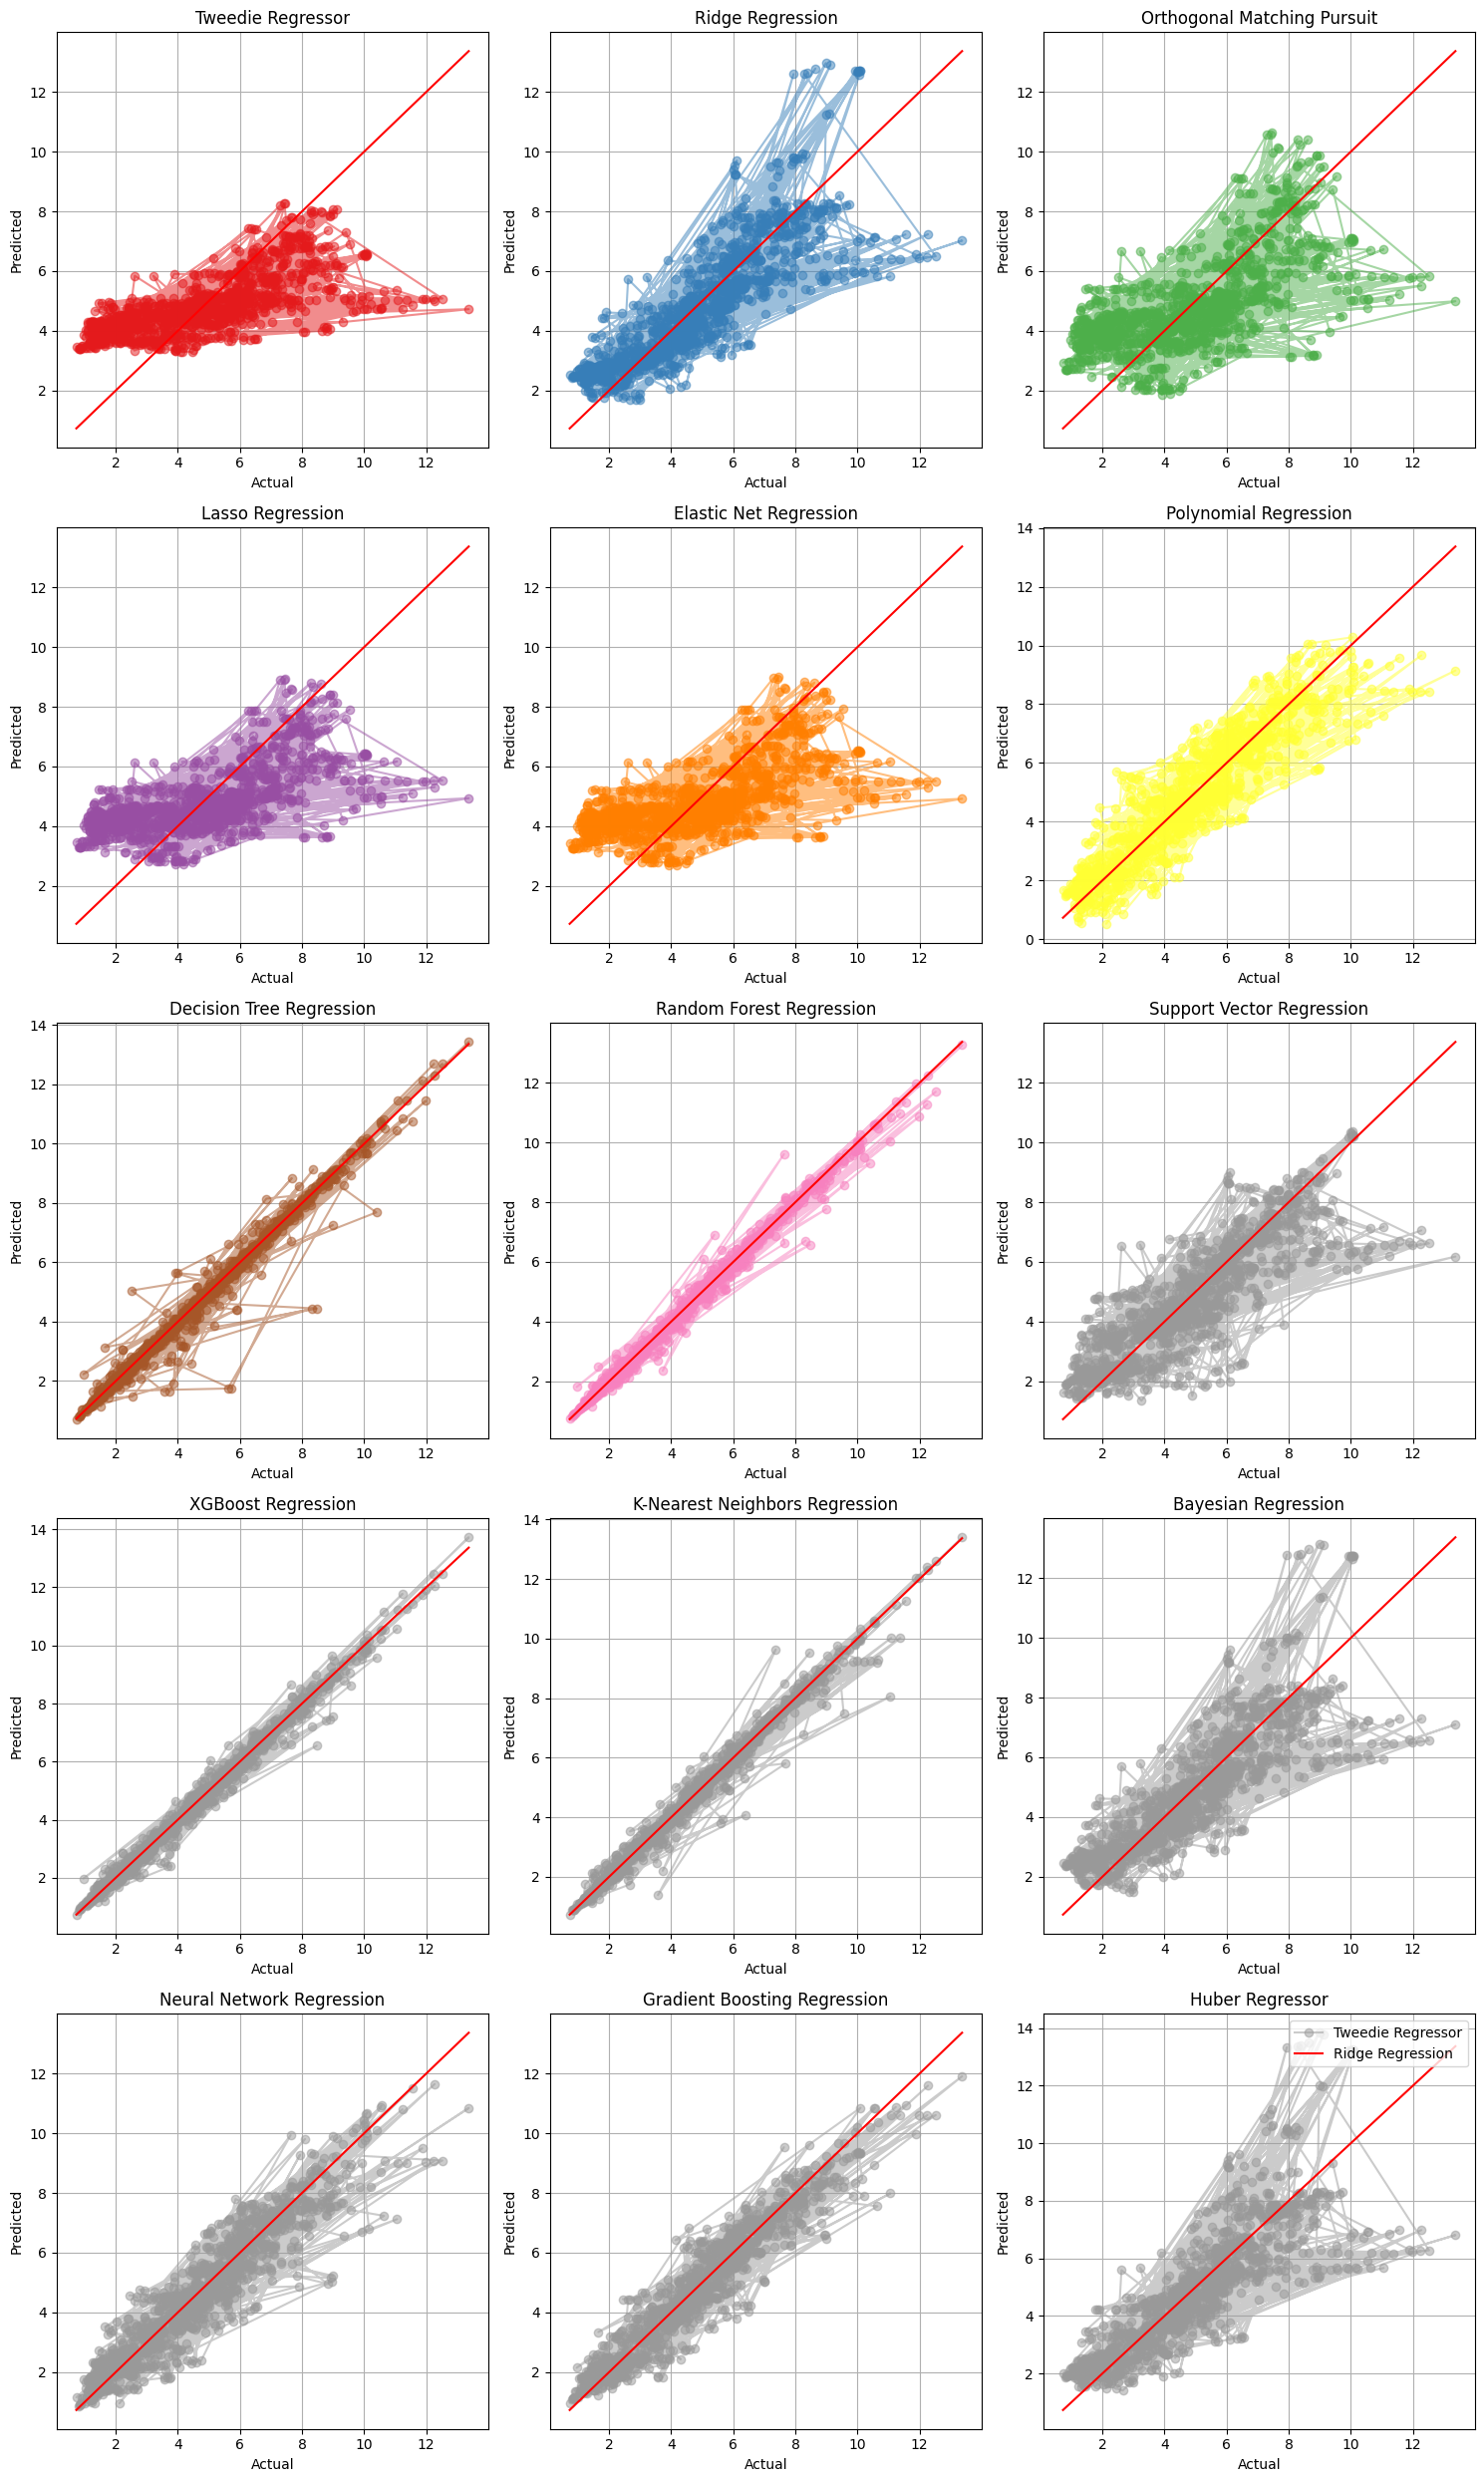

Tweedie Regressor:
  MAE: 1.32
  MSE: 3.08
  R-squared: 0.40
Ridge Regression:
  MAE: 0.88
  MSE: 1.51
  R-squared: 0.70
Orthogonal Matching Pursuit:
  MAE: 1.35
  MSE: 2.99
  R-squared: 0.41
Lasso Regression:
  MAE: 1.37
  MSE: 3.13
  R-squared: 0.39
Elastic Net Regression:
  MAE: 1.35
  MSE: 3.09
  R-squared: 0.39
Polynomial Regression:
  MAE: 0.69
  MSE: 0.84
  R-squared: 0.83
Decision Tree Regression:
  MAE: 0.15
  MSE: 0.12
  R-squared: 0.98
Random Forest Regression:
  MAE: 0.12
  MSE: 0.05
  R-squared: 0.99
Support Vector Regression:
  MAE: 0.84
  MSE: 1.47
  R-squared: 0.71
XGBoost Regression:
  MAE: 0.16
  MSE: 0.06
  R-squared: 0.99
K-Nearest Neighbors Regression:
  MAE: 0.16
  MSE: 0.09
  R-squared: 0.98
Bayesian Regression:
  MAE: 0.88
  MSE: 1.51
  R-squared: 0.70
Neural Network Regression:
  MAE: 0.59
  MSE: 0.65
  R-squared: 0.87
Gradient Boosting Regression:
  MAE: 0.48
  MSE: 0.42
  R-squared: 0.92
Huber Regressor:
  MAE: 0.86
  MSE: 1.62
  R-squared: 0.68


In [24]:
# Create a dictionary to store the model performance
model_performance = {
    'Tweedie Regressor': {'Predicted': tweedie_y_pred, 'Actual': y_test},
    'Ridge Regression': {'Predicted': ridge_y_pred, 'Actual': y_test},
    'Orthogonal Matching Pursuit': {'Predicted': omp_y_pred, 'Actual': y_test},
    'Lasso Regression': {'Predicted': lasso_y_pred, 'Actual': y_test},
    'Elastic Net Regression': {'Predicted': elastic_net_y_pred, 'Actual': y_test},
    'Polynomial Regression': {'Predicted': poly_y_pred, 'Actual': y_test},
    'Decision Tree Regression': {'Predicted': tree_y_pred, 'Actual': y_test},
    'Random Forest Regression': {'Predicted': forest_y_pred, 'Actual': y_test},
    'Support Vector Regression': {'Predicted': svr_y_pred, 'Actual': y_test},
    'XGBoost Regression': {'Predicted': xgb_y_pred, 'Actual': y_test},
    'K-Nearest Neighbors Regression': {'Predicted': knn_y_pred, 'Actual': y_test},
    'Bayesian Regression': {'Predicted': bayesian_y_pred, 'Actual': y_test},
    'Neural Network Regression': {'Predicted': nn_y_pred, 'Actual': y_test},
    'Gradient Boosting Regression': {'Predicted': gb_y_pred, 'Actual': y_test},
    'Huber Regressor': {'Predicted': huber_y_pred, 'Actual': y_test}
}

# Set up figure and axes
num_models = len(model_performance)
num_rows = (num_models // 3) + (1 if num_models % 3 != 0 else 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Define color palette
color_palette = plt.cm.Set1(range(num_models))

# Iterate over the models and plot the predicted vs actual values
for i, (model, performance) in enumerate(model_performance.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Get the predicted and actual values
    y_pred = performance['Predicted']
    y_actual = performance['Actual']

    # Line plot of predicted vs actual values
    ax.plot(y_actual, y_pred, 'o-', color=color_palette[i], alpha=0.5)

    # Add a diagonal line for reference
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='r')

    # Set the title and labels
    ax.set_title(model)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    # Add gridlines
    ax.grid(True)

# Adjust spacing between subplots
fig.tight_layout()

# Create a legend
plt.legend(model_performance.keys(), loc='upper right')

# Show the plot
plt.show()

# Calculate and display means
means = {}
for model, performance in model_performance.items():
    residuals = performance['Actual'] - performance['Predicted']
    mean_absolute_error = np.mean(np.abs(residuals))
    mean_squared_error = np.mean(residuals**2)
    r_squared = 1 - (np.var(residuals) / np.var(performance['Actual']))

    means[model] = {'MAE': mean_absolute_error, 'MSE': mean_squared_error, 'R-squared': r_squared}

# Display means
for model, metrics in means.items():
    print(f"{model}:\n  MAE: {metrics['MAE']:.2f}\n  MSE: {metrics['MSE']:.2f}\n  R-squared: {metrics['R-squared']:.2f}")

In [14]:
# Store the regression models and their scores in a dictionary
regression_scores = {
    "Tweedie Regressor": (tweedie_mse, tweedie_r2),
    "Ridge Regression": (ridge_mse, ridge_r2),
    "Orthogonal Matching Pursuit": (omp_mse, omp_r2),
    "Elastic Net Regression": (elastic_net_mse, elastic_net_r2),
    "Polynomial Regression": (poly_mse, poly_r2),
    "Random Forest Regression": (forest_mse, forest_r2),
    "Gradient Boosting Regression": (gb_mse, gb_r2),
    "Decision Tree Regression": (tree_mse, tree_r2),
    "Lasso Regression": (lasso_mse, lasso_r2),
    "Support Vector Regression": (svr_mse, svr_r2),
    "XGBoost Regression": (xgb_mse, xgb_r2),
    "K-Nearest Neighbors Regression": (knn_mse, knn_r2),
    "Bayesian Regression": (bayesian_mse, bayesian_r2),
    "Neural Network Regression": (nn_mse, nn_r2),
    "Huber Regressor": (huber_mse, huber_r2)
}

# Sort the regression models based on MSE in ascending order and R-squared score in descending order
sorted_models = sorted(regression_scores.items(), key=lambda x: (x[1][0], -x[1][1]))

print("Regression Models in Order of Precision:")
for i, (model, scores) in enumerate(sorted_models, start=1):
    print(f"{i}. {model}")
    print("   Mean Squared Error (MSE):", scores[0])
    print("   R-squared Score:", scores[1])
    print()

most_precise_model = sorted_models[0][0]
least_precise_model = sorted_models[-1][0]

print(f"The most precise model is: {most_precise_model}")
print(f"The least precise model is: {least_precise_model}")

Regression Models in Order of Precision:
1. Random Forest Regression
   Mean Squared Error (MSE): 0.046164214351267115
   R-squared Score: 0.9909244588979441

2. XGBoost Regression
   Mean Squared Error (MSE): 0.058486174032262216
   R-squared Score: 0.9885020532940746

3. K-Nearest Neighbors Regression
   Mean Squared Error (MSE): 0.08573514146671343
   R-squared Score: 0.9831451090155859

4. Decision Tree Regression
   Mean Squared Error (MSE): 0.12212223945833106
   R-squared Score: 0.9759916762528252

5. Gradient Boosting Regression
   Mean Squared Error (MSE): 0.41813043648216885
   R-squared Score: 0.917798666875605

6. Neural Network Regression
   Mean Squared Error (MSE): 0.6544345267961467
   R-squared Score: 0.8713430407078965

7. Polynomial Regression
   Mean Squared Error (MSE): 0.8428057679681417
   R-squared Score: 0.8343106560843121

8. Support Vector Regression
   Mean Squared Error (MSE): 1.4748248090558305
   R-squared Score: 0.7100604145221308

9. Bayesian Regression

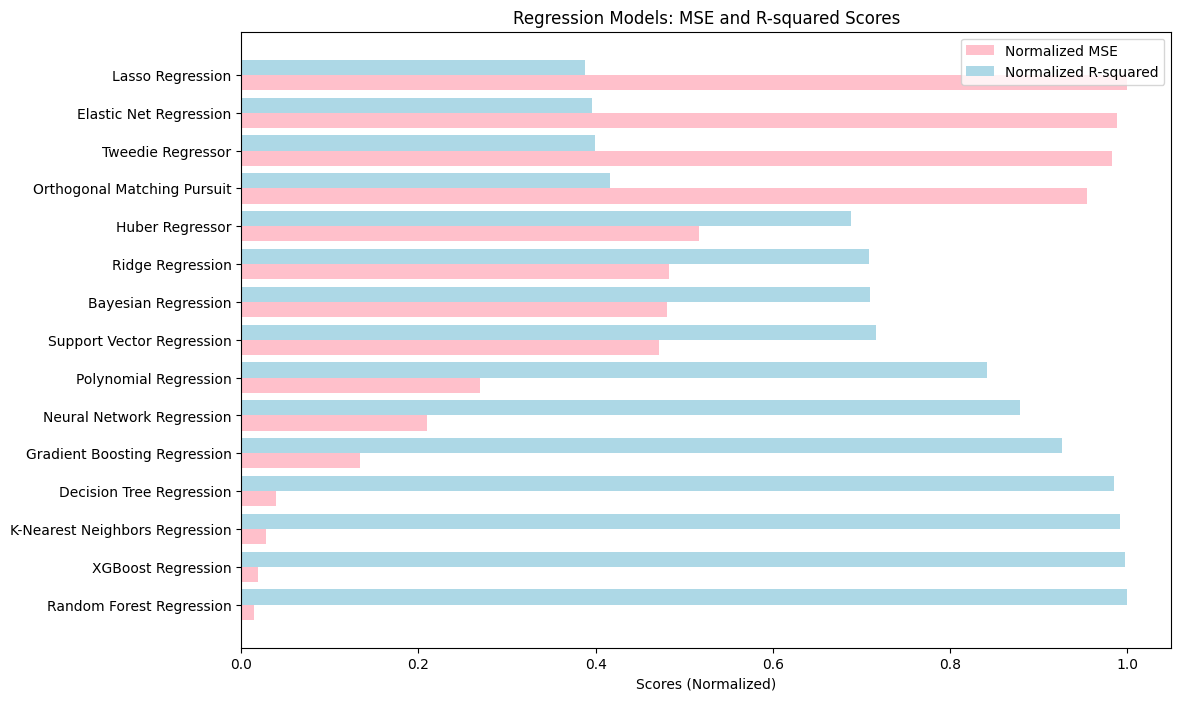

In [22]:
# Normalize the scores for better visualization (optional)
normalized_mse = np.array(mse_scores) / max(mse_scores)
normalized_r2 = np.array(r2_scores) / max(r2_scores)

# Plotting MSE and R-squared scores side by side
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.4
index = np.arange(len(models))

bar1 = ax.barh(index, normalized_mse, bar_width, label='Normalized MSE', color='pink')
bar2 = ax.barh(index + bar_width, normalized_r2, bar_width, label='Normalized R-squared', color='lightblue')

ax.set_xlabel('Scores (Normalized)')
ax.set_title('Regression Models: MSE and R-squared Scores')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(models)
ax.legend()

plt.show()
